In [1]:
import cv2 
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [2]:
import os

In [3]:
def show_img(img):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [57]:
import cv2

def apply_uv_filter(img):


    # Detect face region using Haar Cascade classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # Detect the face region in the image
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(yuv[:, :, 0], scaleFactor=1.1, minNeighbors=5)

    # Apply the UV filter to the face region
    for (x, y, w, h) in faces:

        # Extract the face region
        yuv_face = yuv[y:y+h, x:x+w, :]

        # Apply the UV filter to the face region
        yuv_face[:, :, 1:] = 140
        yuv_face[:,:,0] = ( yuv_face[:,:,0]*0.8 + 1.2*np.power(cv2.equalizeHist(yuv_face[:,:,0]), 1.03) ) /2

        # yuv_face[:,:,0] = np.power(cv2.equalizeHist(yuv_face[:,:,0])/256.0, 0.3)*256
        yuv[y:y+h, x:x+w, :] = yuv_face

    # Convert the image back to the RGB color space
    uv_filtered = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    return uv_filtered


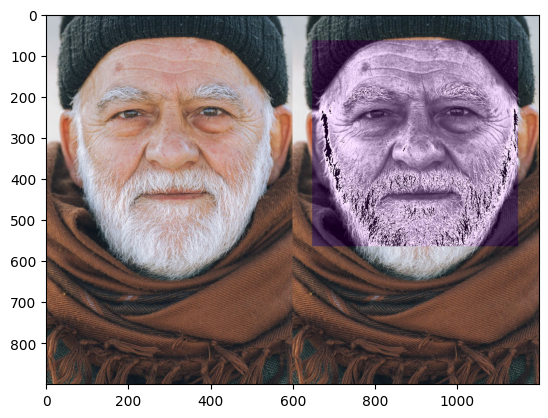

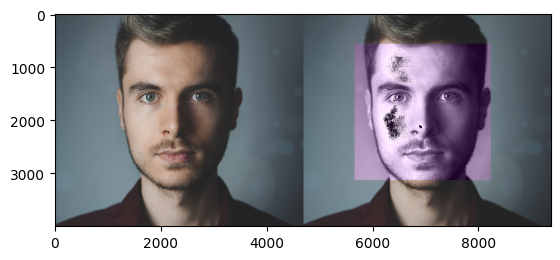

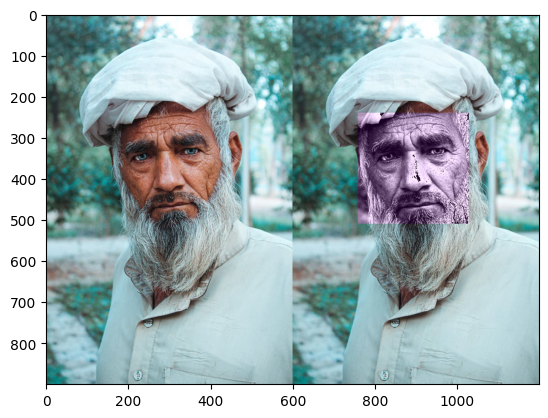

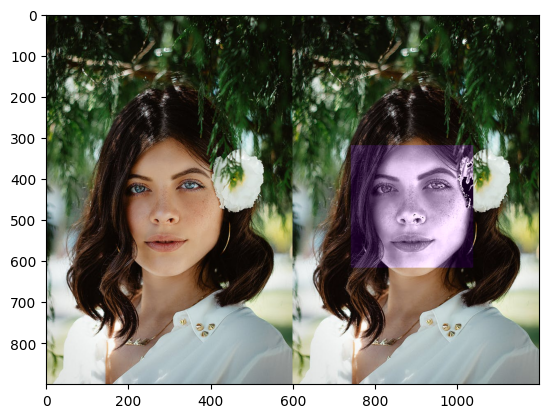

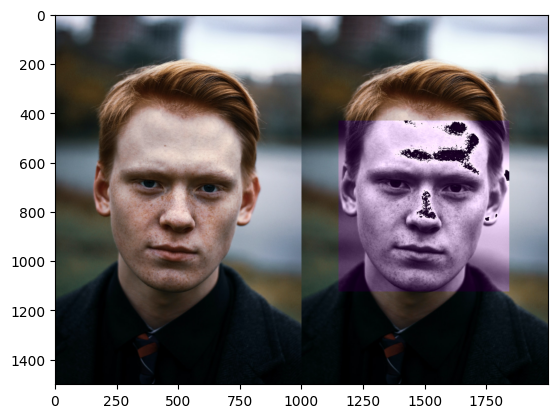

In [59]:
training_img = list(filter( (lambda x: ".jpg" in x or ".jpeg" in x), [os.path.join('Images/', x) for x in os.listdir('Images/')]))


for file in training_img:
  img = cv2.imread(file)
  result = apply_uv_filter(img)

  show_img(np.hstack([img, result]))
  plt.show()